# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [803]:
# libraries needed 
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import warnings
warnings.simplefilter('ignore')


In [804]:
#reading the twitter data
t_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [805]:
#Dowloading the tweet image using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
    
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')  

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [806]:
#reading the tweet_json data
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

with open('tweet_json.txt', encoding='utf8') as file:
    lst=[]
    for line in file:
        lst.append(json.loads(line))

In [807]:
t_list = []

for line in open('tweet_json.txt', 'r'):
    t_data = json.loads(line)
    t_list.append({'tweet_id': t_data['id_str'],
                   'retweet_count': t_data['retweet_count'],
                   'favorite_count': t_data['favorite_count'],
                   'followers_count': t_data['user']['followers_count']})

In [808]:
# convert our dictionaries to a dataframe
t_data = pd.DataFrame( t_list , columns = ['tweet_id' , 'retweet_count', 'favorite_count', 'followers_count' ])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


#### Visual Assesment

In [809]:
# we are just going to view the entire data manually
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [810]:
# we are doing a virtual assesment of image data
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [811]:
# we are just gonna do the virtual assesment here
t_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


#### Programmatic Assesment

In [812]:
# viewing  sample of the t_archive data
t_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None


In [813]:
#doing a programmatic assesment on the t_archive data
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [814]:
# seeing the different counts of the numerator rating
t_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [815]:
# counts of the denominator ratings
t_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [816]:
# the number of times different names has appered in our data
t_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Daisy          7
Toby           7
an             7
Bailey         7
Oscar          6
Rusty          6
Jack           6
Koda           6
Milo           6
Jax            6
Scout          6
Stanley        6
Leo            6
Bella          6
Dave           6
Phil           5
            ... 
Scott          1
Jeremy         1
Durg           1
Goose          1
Aiden          1
Erik           1
Aubie          1
Kuyu           1
Boston         1
Butters        1
Sonny          1
Todo           1
Tino           1
Batdog         1
Dotsy          1
Willy          1
Rizzo          1
Adele          1
Sprinkles      1
Storkson       1
Anna           1
Karl           1
Grady          1
Saydee         1
Iggy           1
Apollo         1
Mojo           1
Tebow         

In [817]:
# view some statistics of the data
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [818]:
# image dataset
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [819]:
#lets look at one of the images which belongs to tweet_id 666020888022790149
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [820]:
# info of the image data
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [821]:
# value counts of p1
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [822]:
# value counts of p2
image_pred.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [823]:
# value counts of p3
image_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [824]:
# info of the t_data for programmatic assessment
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [825]:
# some statistics
t_data.describe()

,retweet_count,favorite_count,followers_count
count,2354.000000,2354.000000,2.354000e+03
mean,3164.797366,8080.968564,3.200942e+06
std,5284.770364,11814.771334,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,624.500000,1415.000000,3.200898e+06
50%,1473.500000,3603.500000,3.200945e+06
75%,3652.000000,10122.250000,3.200953e+06
max,79515.000000,132810.000000,3.201018e+06


### Quality issues
Archive table
1. Remove the retweets and  keep the original tweets 

2. Remove columns that we dont need for this analysis

3. code tweet_id with the  right data type code

4. code timestamp with the right data type code

5. Missing names that are represented as none 

6. Remove the hyperlinks from the text

7. Source column is in form of HTML but not a normal string format

Image table 

8. Diffreent dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.


### Tidiness issues
1. create one column for the different dog stages do away with the previous ones

2. All the three tables should be merged 

3. Drop the tweets that doesnt have images

## Cleaning Data


In [826]:
# Make copies of original pieces of data
t_archive_clean = t_archive.copy()
image_pred_clean = image_pred.copy()
t_data_clean = t_data.copy()



### 1. Define: since we are just going to use the original tweets we have to remove all the retweets

#### Code

In [827]:
# removing the retweets
t_archive_clean = t_archive_clean[pd.isnull(t_archive_clean['retweeted_status_user_id'])]

#### Test

In [828]:
print(sum(t_archive_clean.retweeted_status_user_id.value_counts()))

0


### 2. Define: We are  going to remove the columns that we are not going to use

#### Code

In [829]:
# dropping some columns
t_archive_clean = t_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 'retweeted_status_id'] , axis =1)

#### Test

In [830]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### 3. Define : Changing the tweet_id data type from integer to string

#### Code

In [831]:
# changing the data types
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)
t_data_clean.tweet_id = t_data_clean.tweet_id.astype(str)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)


#### Test

In [832]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


In [833]:
t_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [834]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 4. Define : Changing the data type of timestamp

#### Code

In [835]:
# changing the timestamp datatyoe
t_archive_clean.timestamp= pd.to_datetime(t_archive_clean.timestamp)


#### Test

In [836]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


### 5. Define: Correcting the names that are represented as none

#### Code

In [837]:
t_archive_clean['name'] = t_archive_clean['name'].replace('None', np.nan)

#### Test

In [838]:
t_archive_clean.name.value_counts()

a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
the            8
Lola           8
Winston        8
Daisy          7
Toby           7
Bailey         6
Stanley        6
Bella          6
an             6
Jax            6
Oscar          6
Koda           6
Bo             6
Buddy          5
Bentley        5
Chester        5
Scout          5
Louis          5
Rusty          5
Leo            5
Milo           5
Dave           5
              ..
Kenzie         1
Milky          1
Christoper     1
Bubba          1
Nollie         1
Mojo           1
Apollo         1
Iggy           1
Rover          1
Anakin         1
Tilly          1
Sierra         1
DonDon         1
Kuyu           1
Butters        1
Sonny          1
Todo           1
Tino           1
Batdog         1
Dotsy          1
Willy          1
Rizzo          1
Adele          1
Boston         1
Sprinkles      1
Anna           1
Karl           1
Grady         

### 6. Define: Remove the hyperlinks from the text

#### Code

In [839]:
#define function and apply to t_archive_clean table
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
t_archive_clean.text = t_archive_clean.text.apply(htmlink)

#### Test

In [840]:
# confirm the code
for row in t_archive_clean.text[:4]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us


### 7.Define: Source column is in form of HTML but not a normal string format

#### Code

In [841]:
# extract the values
t_archive_clean.source = t_archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True) 

#### Test

In [842]:
# confirm chages
t_archive_clean.source.value_counts() 

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### 8. Define Changing the case of P1 , p2 and p3 to lowercase

#### Code

In [843]:
# change to lower case
image_pred_clean.p1 = image_pred_clean.p1.str.lower()
image_pred_clean.p2 = image_pred_clean.p2.str.lower()
image_pred_clean.p3 = image_pred_clean.p3.str.lower()

#### Test

In [844]:
# confirm changes
image_pred_clean.p1

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

In [845]:
# confirm changes
image_pred_clean.p2

0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english_springer
6                     mud_turtle
7                tibetan_mastiff
8                shopping_basket
9                       komondor
10               tibetan_mastiff
11             yorkshire_terrier
12              english_foxhound
13                  bull_mastiff
14               german_shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
19                   toy_terrier
20                    toy_poodle
21                         otter
22                  newfoundland
23      chesapeake_bay_retriever
24                siberian_husky
25                         skunk
26                  afghan_hound
27                   toy_terrier
28                    bloodhound
29                    barracouta
          

In [846]:
# confirm changes
image_pred_clean.p3

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
5        greater_swiss_mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               labrador_retriever
11                         pekinese
12                     ibizan_hound
13                   french_bulldog
14                         malinois
15                   dandie_dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               labrador_retriever
24                       eskimo_dog
25                          hamster
26                           briard
27                         p

### Tidiness

### 1. Define. Creating a column to represent the different dog stages

In [847]:
#replace the none 
t_archive_clean.doggo.replace('None', '', inplace=True) 
t_archive_clean.floofer.replace('None', '', inplace=True) 
t_archive_clean.pupper.replace('None', '', inplace=True) 
t_archive_clean.puppo.replace('None', '', inplace=True) 

# Then combine stage columns.
t_archive_clean['dog_stage'] = t_archive_clean.doggo + t_archive_clean.floofer + t_archive_clean.pupper + t_archive_clean.puppo

# drop the unused columns
t_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True) 

# Then format entries with multiple dog stages which appeared like doggopupper.
t_archive_clean.loc[t_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
t_archive_clean.loc[t_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
t_archive_clean.loc[t_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'


### Test

In [848]:
# change the dog datatype
t_archive_clean.dog_stage = t_archive_clean.dog_stage.astype('category') 

In [849]:
# confirm changes
t_archive_clean.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### 2. Define: Merge the three tables

#### Code

In [850]:
# merging the tables
t_archive_clean = pd.merge(left=t_archive_clean, right=t_data_clean, how='left', on='tweet_id')
t_archive_clean = pd.merge(left=t_archive_clean, right=image_pred_clean, how='left', on='tweet_id')



#### Test

In [851]:
# confirm changes
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
dog_stage             2175 non-null category
retweet_count         2175 non-null int64
favorite_count        2175 non-null int64
followers_count       2175 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               199

### 3 Define : Drop the tweets with zero images

#### Code

In [852]:
# dropping the tweets with zero image
t_archive_clean.dropna(axis=0 ,inplace= True)

#### Test

In [853]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 2173
Data columns (total 22 columns):
tweet_id              1448 non-null object
timestamp             1448 non-null datetime64[ns]
source                1448 non-null object
text                  1448 non-null object
rating_numerator      1448 non-null int64
rating_denominator    1448 non-null int64
name                  1448 non-null object
dog_stage             1448 non-null category
retweet_count         1448 non-null int64
favorite_count        1448 non-null int64
followers_count       1448 non-null int64
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null object
p2                    1448 non-null object
p2_conf               1448 non-null float64
p2_dog                1448 non-null object
p3                    1448 non-null object
p3_conf               144

### Save the clean data as a master dataset

In [854]:
# first we make a copy of the clean dataset
t_archive_clean1 = t_archive_clean.copy()

In [855]:
t_archive_clean1.to_csv('twitter_archive_master.csv', index= False)

#### Test

In [856]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [857]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 22 columns):
tweet_id              1448 non-null int64
timestamp             1448 non-null object
source                1448 non-null object
text                  1448 non-null object
rating_numerator      1448 non-null int64
rating_denominator    1448 non-null int64
name                  1448 non-null object
dog_stage             189 non-null object
retweet_count         1448 non-null int64
favorite_count        1448 non-null int64
followers_count       1448 non-null int64
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null bool
p2                    1448 non-null object
p2_conf               1448 non-null float64
p2_dog                1448 non-null bool
p3                    1448 non-null object
p3_conf               1448 non-null float

## Analyzing and Visualizing Data


In [858]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [859]:
twitter_archive_master. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 22 columns):
tweet_id              1448 non-null int64
timestamp             1448 non-null object
source                1448 non-null object
text                  1448 non-null object
rating_numerator      1448 non-null int64
rating_denominator    1448 non-null int64
name                  1448 non-null object
dog_stage             189 non-null object
retweet_count         1448 non-null int64
favorite_count        1448 non-null int64
followers_count       1448 non-null int64
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null bool
p2                    1448 non-null object
p2_conf               1448 non-null float64
p2_dog                1448 non-null bool
p3                    1448 non-null object
p3_conf               1448 non-null float

In [860]:
# We have to change our data types again
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.source = twitter_archive_master.source.astype("category")


In [861]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 22 columns):
tweet_id              1448 non-null object
timestamp             1448 non-null datetime64[ns]
source                1448 non-null category
text                  1448 non-null object
rating_numerator      1448 non-null int64
rating_denominator    1448 non-null int64
name                  1448 non-null object
dog_stage             189 non-null object
retweet_count         1448 non-null int64
favorite_count        1448 non-null int64
followers_count       1448 non-null int64
jpg_url               1448 non-null object
img_num               1448 non-null float64
p1                    1448 non-null object
p1_conf               1448 non-null float64
p1_dog                1448 non-null bool
p2                    1448 non-null object
p2_conf               1448 non-null float64
p2_dog                1448 non-null bool
p3                    1448 non-null object
p3_conf               1448 non

### Insights:
1. Look at the most popular dog name

2. favorites count over time

3. Retweet count overtime

4. correlation between favorite count and retweet


###  Analysis and Visualization

#### 1.Most popular dog name

In [862]:
twitter_archive_master.name.value_counts()

a             55
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Toby           7
Lola           7
the            7
Daisy          7
an             6
Bo             6
Jax            6
Koda           6
Stanley        6
Bella          6
Chester        5
Leo            5
Buddy          5
Rusty          5
Bailey         5
Oscar          5
Dave           5
Scout          5
Milo           5
Louis          5
Maggie         4
              ..
Milky          1
Christoper     1
Bubba          1
Scott          1
Shnuggles      1
Nollie         1
Tilly          1
Mojo           1
Sierra         1
DonDon         1
Kuyu           1
Butters        1
Sonny          1
Todo           1
Tino           1
Batdog         1
Dotsy          1
Divine         1
Willy          1
Rizzo          1
Adele          1
Boston         1
Sprinkles      1
Anna           1
Karl           1
Grady          1
Saydee         1
Iggy          

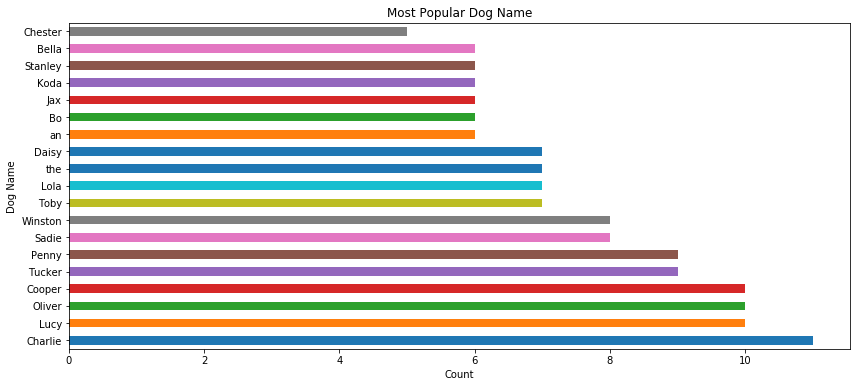

In [863]:
twitter_archive_master.name.value_counts()[1:20].plot('barh', figsize=(14,6))
plt.title('Most Popular Dog Name')
plt.xlabel('Count')
plt.ylabel('Dog Name');

We can see that the most popular dog is Charlie with a value of 11

#### 2. Favorites count overtime

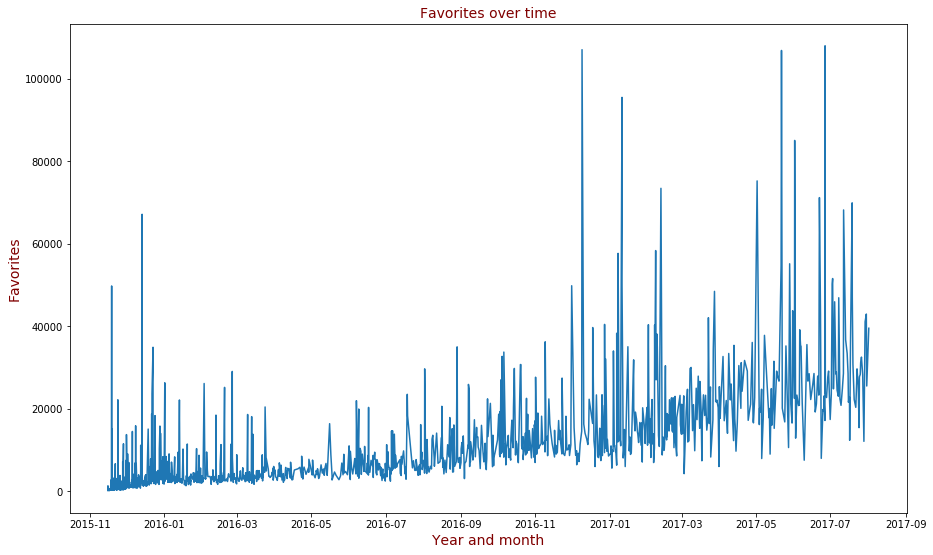

In [864]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.favorite_count)
plt.title('Favorites over time', color = 'maroon', fontsize = '14')
plt.xlabel('Year and month', color = 'maroon', fontsize = '14')
plt.ylabel('Favorites', color = 'maroon', fontsize = '14');

From our data we can see that favorites spiked in the year 2016 and 2017

#### 3. Retweets overtime

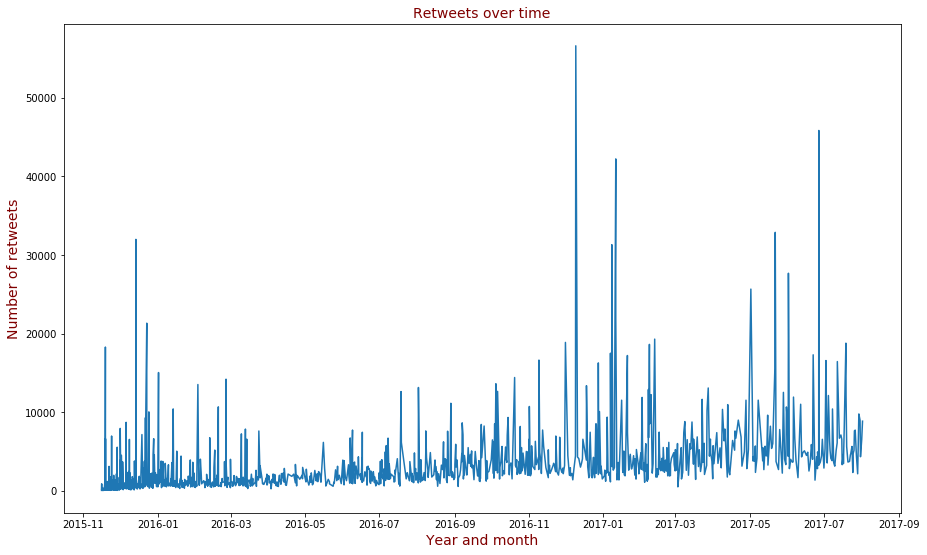

In [865]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.retweet_count)
plt.title('Retweets over time', color = 'maroon', fontsize = '14')
plt.xlabel('Year and month', color = 'maroon', fontsize = '14')
plt.ylabel('Number of retweets', color = 'maroon', fontsize = '14');

Retweets really increased in the year 2016 towrds 2017

#### 4. Correlation between favorite count and retweets

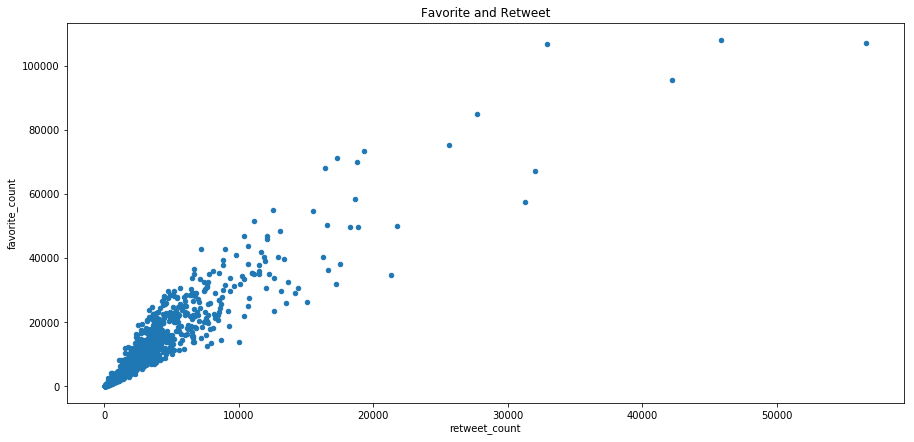

In [866]:
twitter_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter',figsize=(15,7), title = 'Favorite and Retweet'); 

In [867]:
twitter_archive_master['retweet_count'].corr(twitter_archive_master['favorite_count']) 

0.9240070692143515

From the above data we can see there is a positive correlation between retweets and favorites which has a value of 0.924